<link rel="stylesheet" type="text/css" href="styles.css">
<center>
  <h1>Data_Science_Salaries</h1>
  <div class="card">
  <img src="https://i.pinimg.com/564x/d2/6a/2f/d26a2f5d77b89365b8fecd1e9652526a.jpg" alt="Image Description" style="width: 100%;height:100%; object-fit: cover; border-radius: 10px 10px 0 0;">
  <div class="card__content">
    <h2 class="card__title">Created by : Raouane Amine</h2>
    <p class="card__description">This is a Data_Science_Salary prediction project using a Us dataset , Python libraries and machine learning models</p>
  </div>
</div></center>

<style>
  /* Additional styles or overrides go here */
  .card {
  position: relative;
  width: 500px;
  height: 300px;
  background-color: #f2f2f2;
  border-radius: 10px;
  display: flex;
  align-items: center;
  justify-content: center;
  overflow: hidden;
  perspective: 1000px;
  box-shadow: 0 0 0 5px #ffffff80;
  transition: all 0.6s cubic-bezier(0.175, 0.885, 0.32, 1.275);
}

.card svg {
  width: 48px;
  fill: #333;
  transition: all 0.6s cubic-bezier(0.175, 0.885, 0.32, 1.275);
}

.card:hover {
  transform: scale(1.05);
  box-shadow: 0 8px 16px rgba(255, 255, 255, 0.2);
}

.card__content {
  position: absolute;
  top: 0;
  left: 0;
  width: 100%;
  height: 100%;
  padding: 20px;
  box-sizing: border-box;
  background-color: #f2f2f2;
  transform: rotateX(-90deg);
  transform-origin: bottom;
  transition: all 0.6s cubic-bezier(0.175, 0.885, 0.32, 1.275);
}

.card:hover .card__content {
  transform: rotateX(0deg);
}

.card__title {
  margin: 0;
  font-size: 24px;
  color: #333;
  font-weight: 7000;
}

.card:hover svg {
  scale: 0;
}

.card__description {
  margin: 10px 0 0;
  font-size: 20px;
  color: #000000;
  line-height: 1.4;
  display: flex;
  align-items: center;
  justify-content: center;
  text-align: center;
  margin-top: 80px;
}
</style>

# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring the data

In [2]:
Data=pd.read_csv("jobs_in_data.csv")
Data.head()

,work_year,job_title,job_category,salary_currency,salary,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_location,company_size
0,2023,Data DevOps Engineer,Data Engineering,EUR,88000,95012,Germany,Mid-level,Full-time,Hybrid,Germany,L
1,2023,Data Architect,Data Architecture and Modeling,USD,186000,186000,United States,Senior,Full-time,In-person,United States,M
2,2023,Data Architect,Data Architecture and Modeling,USD,81800,81800,United States,Senior,Full-time,In-person,United States,M
3,2023,Data Scientist,Data Science and Research,USD,212000,212000,United States,Senior,Full-time,In-person,United States,M
4,2023,Data Scientist,Data Science and Research,USD,93300,93300,United States,Senior,Full-time,In-person,United States,M


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9355 entries, 0 to 9354
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           9355 non-null   int64 
 1   job_title           9355 non-null   object
 2   job_category        9355 non-null   object
 3   salary_currency     9355 non-null   object
 4   salary              9355 non-null   int64 
 5   salary_in_usd       9355 non-null   int64 
 6   employee_residence  9355 non-null   object
 7   experience_level    9355 non-null   object
 8   employment_type     9355 non-null   object
 9   work_setting        9355 non-null   object
 10  company_location    9355 non-null   object
 11  company_size        9355 non-null   object
dtypes: int64(3), object(9)
memory usage: 877.2+ KB


# Data Cleaning
### The Salary in Usd is enough for the analysis

In [4]:
Data.drop(columns=["salary_currency","salary"],inplace=True)

In [5]:
counts = Data["company_location"].value_counts()
filtered_counts = counts[counts > 20].to_frame()
filtered_counts


,count
company_location,
United States,8132
United Kingdom,449
Canada,226
Spain,113
Germany,72
France,50
Australia,24
Portugal,24
Netherlands,21


### As you can see the first location's count is 20 times the second one so we gonna focus just on the US

In [6]:
Data=Data[Data["company_location"]=='United States']


In [7]:
Data.drop("company_location",inplace=True,axis=1)

In [8]:
Data.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_size
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,M
5,2023,Data Scientist,Data Science and Research,130000,United States,Senior,Full-time,Remote,M


# Data visualization
### The categories

<Axes: xlabel='job_category'>

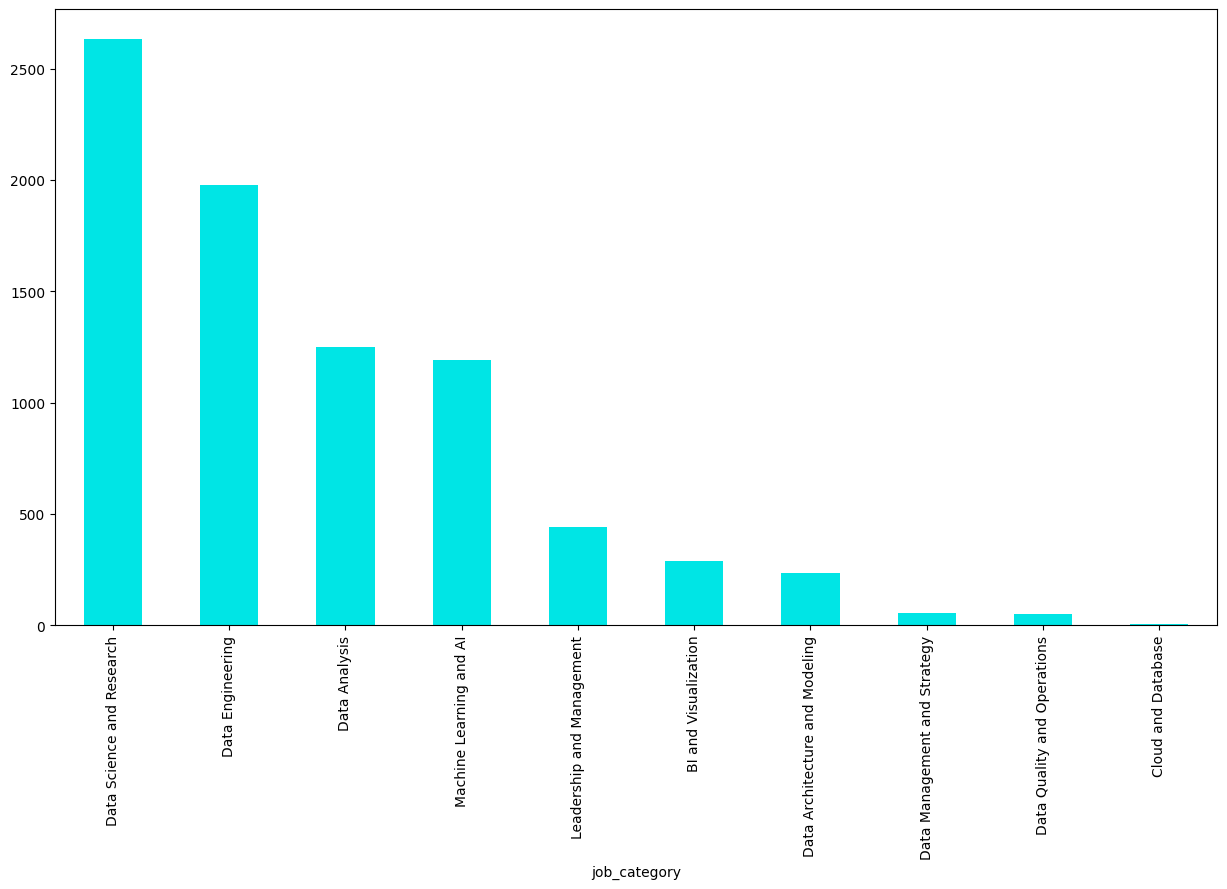

In [9]:
plt.figure(figsize=(15,8))
Data["job_category"].value_counts().plot(kind="bar", color='#00E5E5')


### The job Titles

Text(0, 0.5, 'Count')

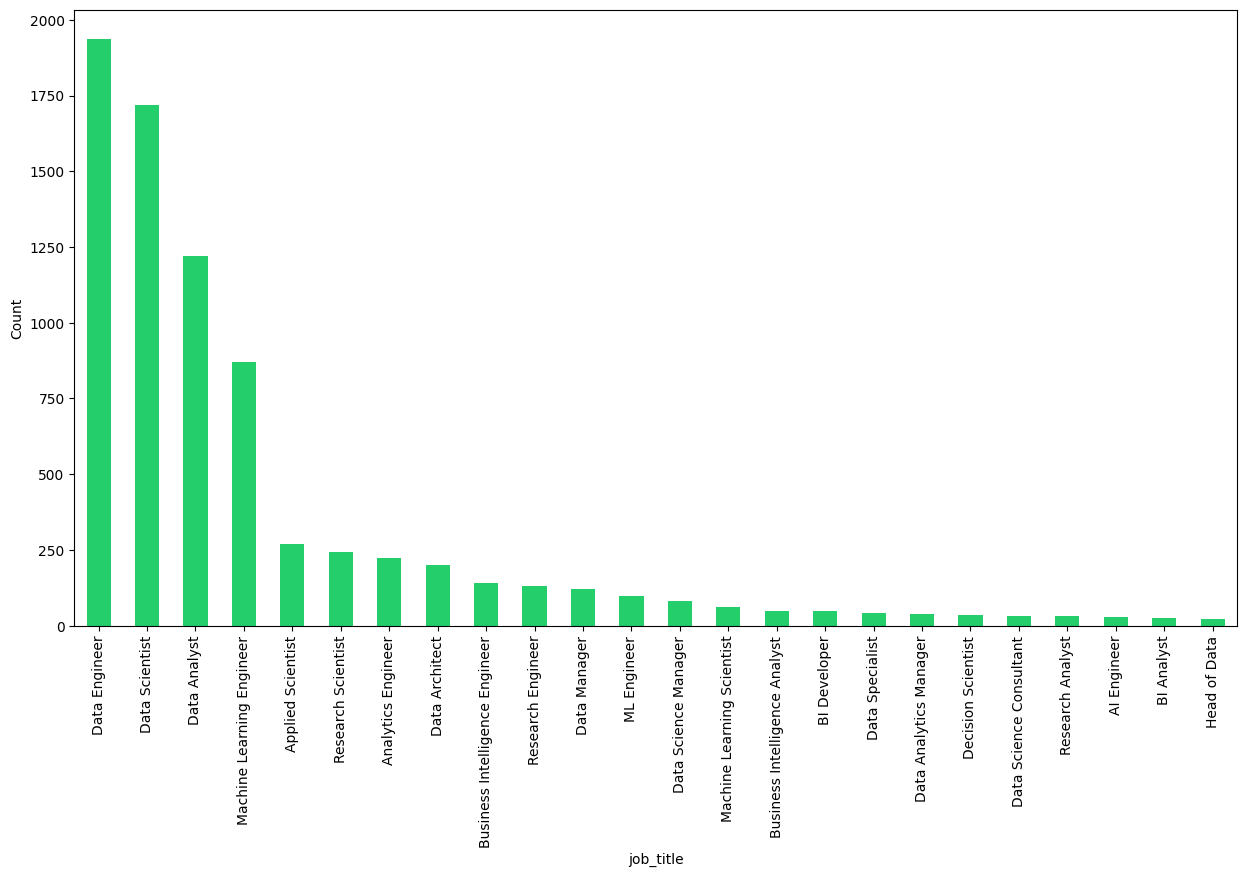

In [10]:
plt.figure(figsize=(15,8))
job_title_counts = Data["job_title"].value_counts()
Data2 = Data[Data["job_title"].isin(job_title_counts[job_title_counts > 20].index)]
Data2["job_title"].value_counts().plot(kind="bar",color='#23CE6B').set_ylabel("Count")



### Work settings and Experience levels Comparison

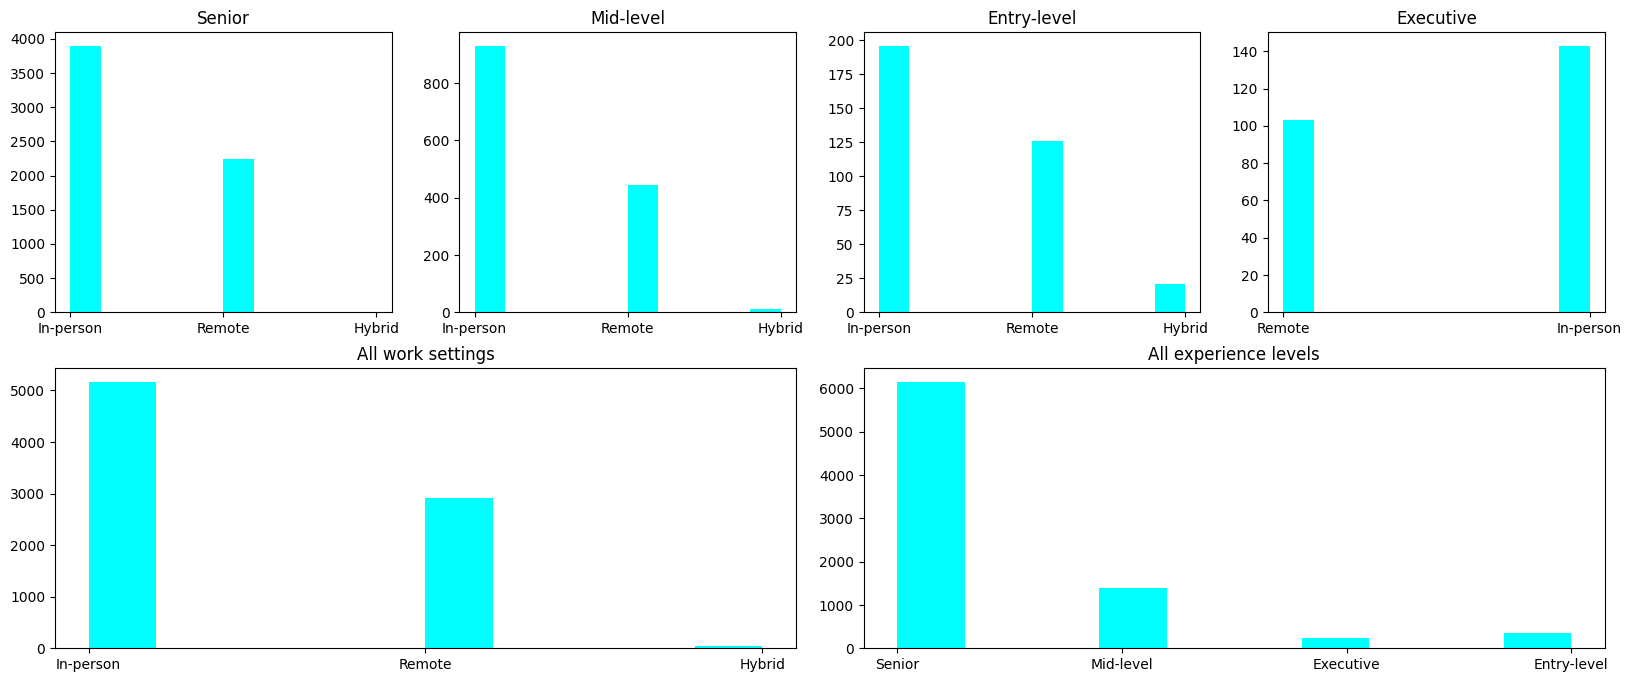

In [11]:
plt.figure(figsize=(20,8))

ax1 = plt.subplot2grid((2,4), (0,0))
ax2 = plt.subplot2grid((2,4), (0,1))
ax3 = plt.subplot2grid((2,4), (0,2))
ax4 = plt.subplot2grid((2,4), (0,3))
ax5 = plt.subplot2grid((2,4), (1,0),colspan=2)
ax6 = plt.subplot2grid((2,4), (1,2),colspan=2)
ax1.hist(Data[Data["experience_level"] == "Senior"]["work_setting"],color='#00FFFF')
ax1.set_title("Senior")
ax3.hist(Data[Data["experience_level"] == "Entry-level"]["work_setting"],color='#00FFFF')
ax3.set_title("Entry-level")
ax2.hist(Data[Data["experience_level"] == "Mid-level"]["work_setting"],color='#00FFFF')
ax2.set_title("Mid-level")
ax4.hist(Data[Data["experience_level"] == "Executive"]["work_setting"],color='#00FFFF')
ax4.set_title("Executive")
ax5.hist(Data["work_setting"],color='#00FFFF')
ax5.set_title("All work settings")
ax6.hist(Data["experience_level"],color='#00FFFF')
ax6.set_title("All experience levels")

plt.show()


### Work year and company size

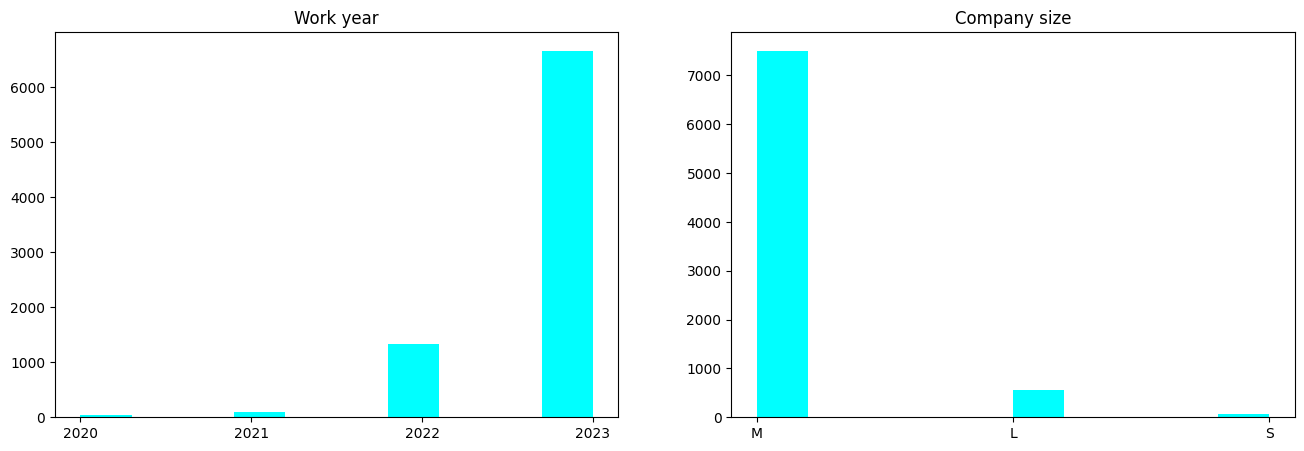

In [12]:
plt.figure(figsize=(16,5))
A = plt.subplot2grid((1,2), (0,0))
B = plt.subplot2grid((1,2), (0,1))

A.hist(Data["work_year"],color='#00FFFF')
A.set_title("Work year count")
A.set_xticks([2020,2021,2022,2023])
B.hist(Data["company_size"],color='#00FFFF')
B.set_title("Company size count")

plt.show()

In [13]:
Data.head()

,work_year,job_title,job_category,salary_in_usd,employee_residence,experience_level,employment_type,work_setting,company_size
1,2023,Data Architect,Data Architecture and Modeling,186000,United States,Senior,Full-time,In-person,M
2,2023,Data Architect,Data Architecture and Modeling,81800,United States,Senior,Full-time,In-person,M
3,2023,Data Scientist,Data Science and Research,212000,United States,Senior,Full-time,In-person,M
4,2023,Data Scientist,Data Science and Research,93300,United States,Senior,Full-time,In-person,M
5,2023,Data Scientist,Data Science and Research,130000,United States,Senior,Full-time,Remote,M


# Transforming the Data

In [14]:
Data["work_year"]=Data["work_year"].apply(lambda x: x % 2020) 

In [15]:
Data["salary_in_usd"]=Data["salary_in_usd"].apply(lambda x: 1 if x>100000 else 0)

In [16]:
Data_Cleaned=pd.get_dummies(Data,columns=[
 'job_title',
 'job_category',
 'employee_residence',
 'experience_level',
 'employment_type',
 'work_setting',
 'company_size'])*1

### Too Much Features So we gonna focus just on the most important ones (15%) in the correlation matrix


In [17]:
correlations = Data_Cleaned.corr()["salary_in_usd"].abs().sort_values()
Cols_Todrop=correlations.iloc[:int(0.85*len(Data_Cleaned.columns))].index
newData=Data_Cleaned.drop(columns=Cols_Todrop,axis=1)
newData

,work_year,salary_in_usd,job_title_Applied Scientist,job_title_BI Data Analyst,job_title_Data Analyst,job_title_Data Manager,job_title_Data Operations Specialist,job_title_Data Quality Analyst,job_title_Data Scientist,job_title_Data Specialist,...,job_category_Data Management and Strategy,job_category_Data Quality and Operations,job_category_Data Science and Research,job_category_Machine Learning and AI,employee_residence_United States,experience_level_Entry-level,experience_level_Mid-level,experience_level_Senior,employment_type_Full-time,company_size_S
1,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,3,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
4,3,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
5,3,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,1,1,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,1,0
9351,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,1,0
9352,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
9353,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,1,1


<Axes: >

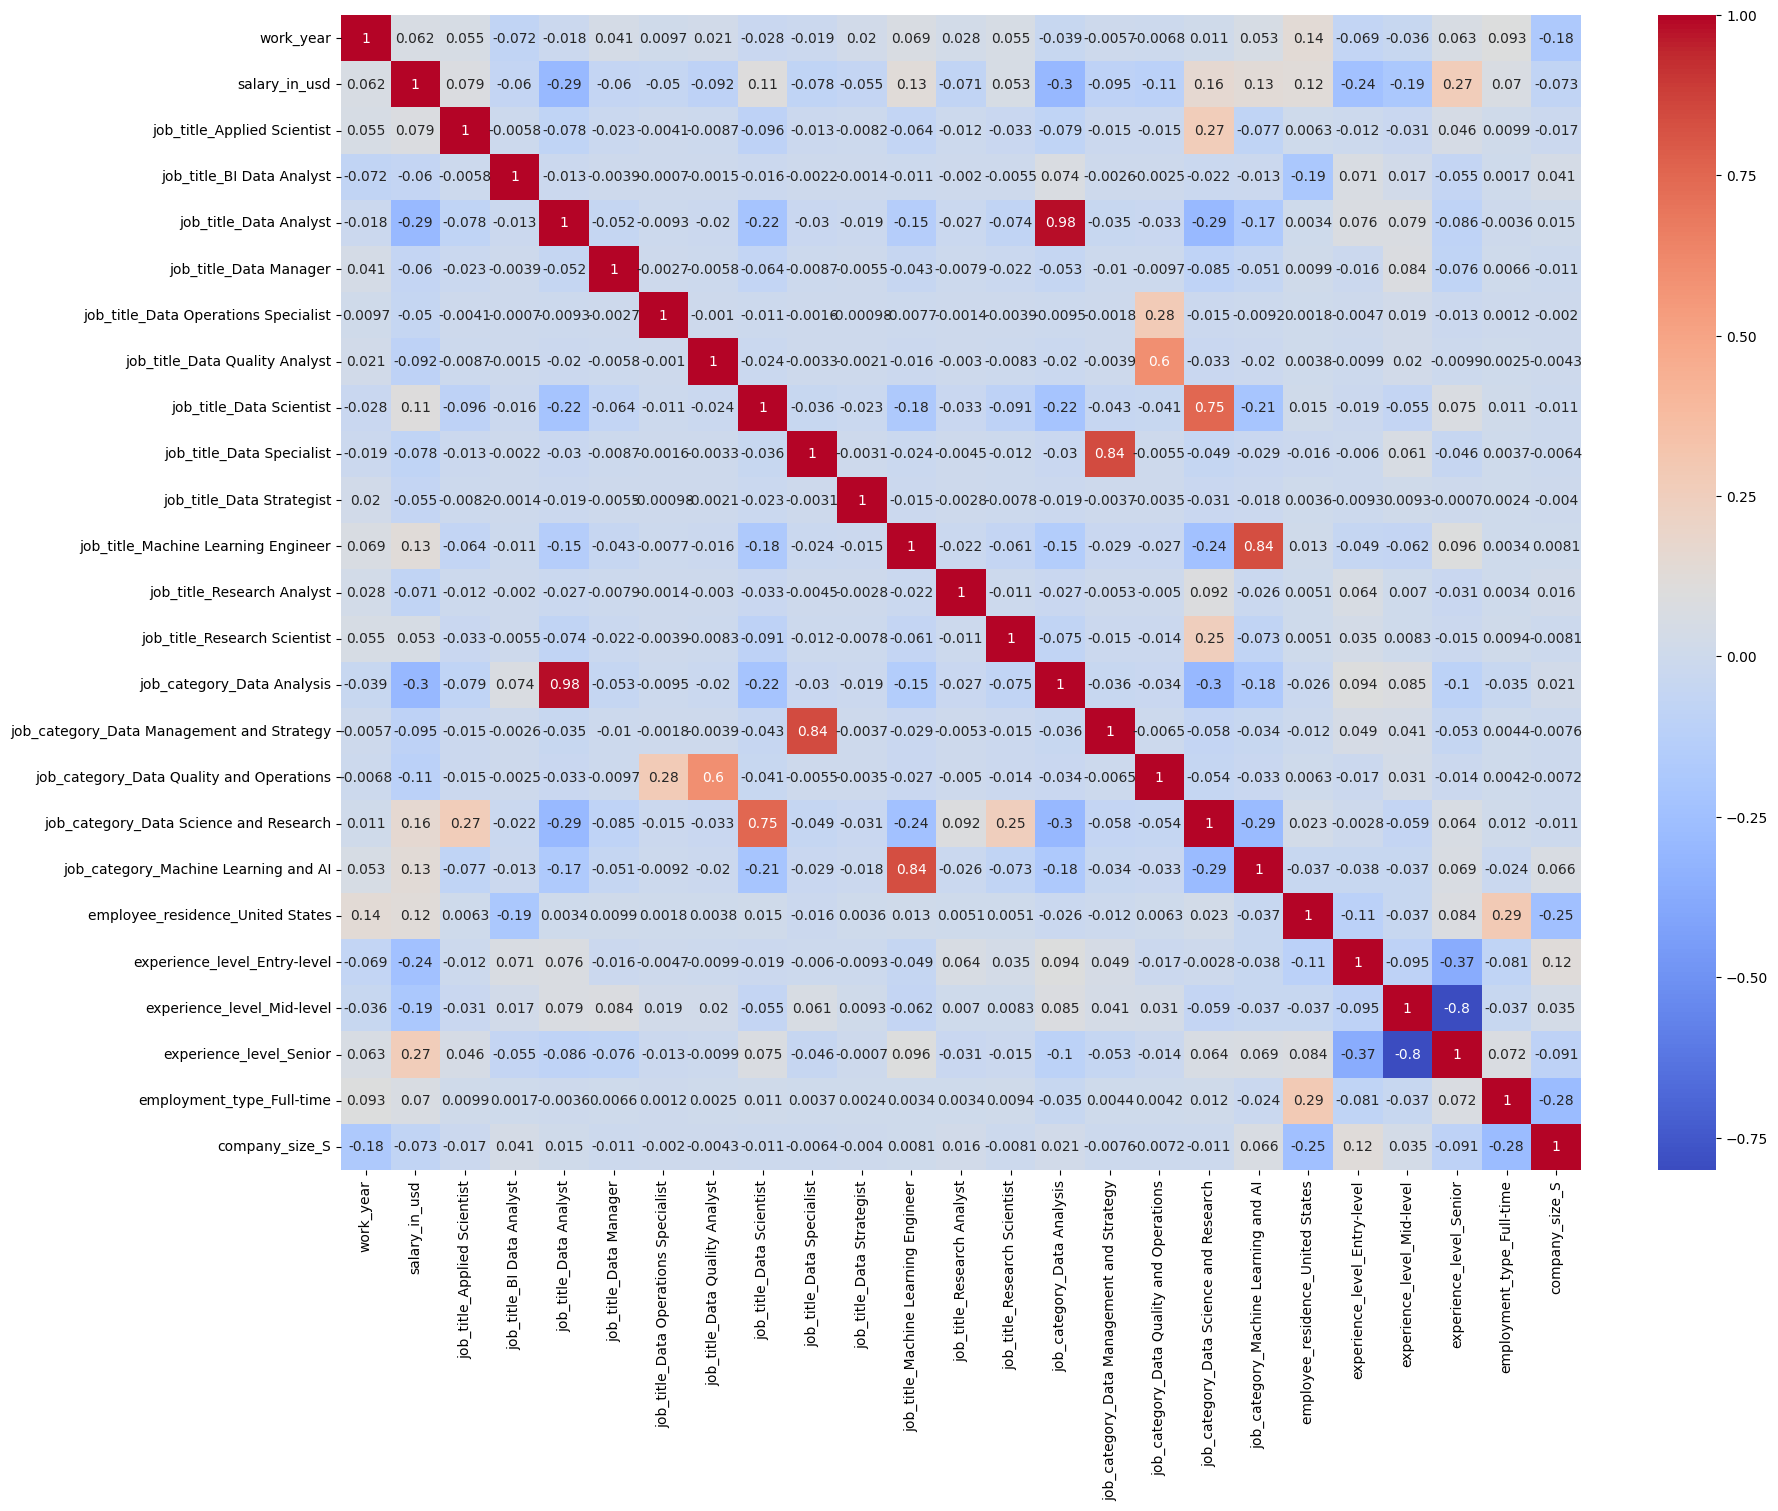

In [18]:
plt.figure(figsize=(20,15))
sns.heatmap(newData.corr(),annot=True,cmap="coolwarm")

# Machine learning

In [19]:
from sklearn.model_selection import train_test_split
X=Data_Cleaned.drop(columns=["salary_in_usd"])
Y=Data_Cleaned["salary_in_usd"]

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [21]:
from sklearn.ensemble import RandomForestClassifier


Forest=RandomForestClassifier()
Forest.fit(X_train,Y_train)

RandomForestClassifier()

In [22]:
Forest.score(X_test,Y_test)

0.858020897357099

<h1>85% Accuracy 🎯 can we do Better ???</h1>
<h2>Let's see the important factors</h2>

In [23]:
Factors = dict(zip(Forest.feature_names_in_,Forest.feature_importances_))
Factors = {k: v for k, v in sorted(Factors.items(), key=lambda item: item[1],reverse=True)}
Factors

{'job_category_Data Analysis': 0.09486905450726894,
 'experience_level_Senior': 0.09417449609997396,
 'job_title_Data Analyst': 0.09386887570952736,
 'experience_level_Entry-level': 0.09231972002243083,
 'experience_level_Mid-level': 0.05878661639915729,
 'work_year': 0.05423518102335119,
 'job_category_Data Science and Research': 0.03648341351797024,
 'work_setting_In-person': 0.027963611544047445,
 'work_setting_Remote': 0.02723655983863951,
 'job_category_Machine Learning and AI': 0.02140003355374494,
 'job_category_Data Quality and Operations': 0.01872077923415975,
 'job_title_Machine Learning Engineer': 0.016913296961187714,
 'employee_residence_United States': 0.01690476459802225,
 'job_title_Research Analyst': 0.016005627655546997,
 'company_size_M': 0.01582390031470847,
 'experience_level_Executive': 0.015485933868499885,
 'company_size_L': 0.013197892790102325,
 'job_title_Data Scientist': 0.012505644121143541,
 'job_title_Data Manager': 0.012423338112476128,
 'job_title_Data 

In [46]:
from sklearn.model_selection import GridSearchCV

Parameters = {
    'n_estimators':[90],
    'max_depth':[34,35,36],
    'min_samples_split':[8,9,10,11]
    }

Grid = GridSearchCV(estimator=RandomForestClassifier(),param_grid=Parameters,verbose=5)

In [47]:
Grid.fit(X_train,Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END max_depth=34, min_samples_split=8, n_estimators=90;, score=0.858 total time=   0.8s
[CV 2/5] END max_depth=34, min_samples_split=8, n_estimators=90;, score=0.848 total time=   0.7s
[CV 3/5] END max_depth=34, min_samples_split=8, n_estimators=90;, score=0.859 total time=   1.2s
[CV 4/5] END max_depth=34, min_samples_split=8, n_estimators=90;, score=0.856 total time=   0.7s
[CV 5/5] END max_depth=34, min_samples_split=8, n_estimators=90;, score=0.852 total time=   0.9s
[CV 1/5] END max_depth=34, min_samples_split=9, n_estimators=90;, score=0.861 total time=   1.1s
[CV 2/5] END max_depth=34, min_samples_split=9, n_estimators=90;, score=0.847 total time=   0.8s
[CV 3/5] END max_depth=34, min_samples_split=9, n_estimators=90;, score=0.858 total time=   0.6s
[CV 4/5] END max_depth=34, min_samples_split=9, n_estimators=90;, score=0.858 total time=   0.6s
[CV 5/5] END max_depth=34, min_samples_split=9, n_estimators=90;, 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [34, 35, 36],
                         'min_samples_split': [8, 9, 10, 11],
                         'n_estimators': [90]},
             verbose=5)

In [48]:
Best = Grid.best_estimator_
Best

RandomForestClassifier(max_depth=34, min_samples_split=9, n_estimators=90)

In [49]:
Best.score(X_test,Y_test)

0.860479409956976

## 86%